In [1]:
import math
import h5py
import tensorflow as tf
from tensorflow.python.framework import ops
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [2]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/User/Downloads/"
train_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_dir)

In [3]:
# Resize images
images32 = [transform.resize(image, (28, 28)) for image in images]
images32 = np.array(images32)

C:\Users\User\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\User\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [4]:
images32 = rgb2gray(np.array(images32))

In [5]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [6]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(551):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 271
DONE WITH EPOCH
EPOCH 272
DONE WITH EPOCH
EPOCH 273
DONE WITH EPOCH
EPOCH 274
DONE WITH EPOCH
EPOCH 275
DONE WITH EPOCH
EPOCH 276
DONE WITH EPOCH
EPOCH 277
DONE WITH EPOCH
EPOCH 278
DONE WITH EPOCH
EPOCH 279
DONE WITH EPOCH
EPOCH 280
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 281
DONE WITH EPOCH
EPOCH 282
DONE WITH EPOCH
EPOCH 283
DONE WITH EPOCH
EPOCH 284
DONE WITH EPOCH
EPOCH 285
DONE WITH EPOCH
EPOCH 286
DONE WITH EPOCH
EPOCH 287
DONE WITH EPOCH
EPOCH 288
DONE WITH EPOCH
EPOCH 289
DONE WITH EPOCH
EPOCH 290
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 291
DONE WITH EPOCH
EPOCH 292
DONE WITH EPOCH
EPOCH 293
DONE WITH EPOCH
EPOCH 294
DONE WITH EPOCH
EPOCH 295
DONE WITH EPOCH
EPOCH 296
DONE WITH EPOCH
EPOCH 297
DONE WITH EPOCH
EPOCH 298
DONE WITH EPOCH
EPOCH 299
DONE WITH EPOCH
EPOCH 300
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 30

DONE WITH EPOCH
EPOCH 539
DONE WITH EPOCH
EPOCH 540
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 541
DONE WITH EPOCH
EPOCH 542
DONE WITH EPOCH
EPOCH 543
DONE WITH EPOCH
EPOCH 544
DONE WITH EPOCH
EPOCH 545
DONE WITH EPOCH
EPOCH 546
DONE WITH EPOCH
EPOCH 547
DONE WITH EPOCH
EPOCH 548
DONE WITH EPOCH
EPOCH 549
DONE WITH EPOCH
EPOCH 550
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH


In [7]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[19, 20, 30, 18, 33, 37, 61, 45, 38, 47]
[19 20 32 18 38 37 61 45 38 47]


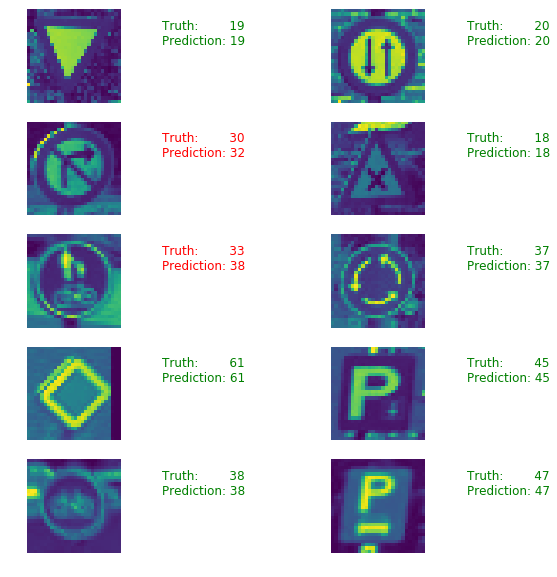

In [8]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [9]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

C:\Users\User\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\User\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Accuracy: 0.734


In [10]:
sess.close()